In [1]:
import math
import matplotlib.pyplot as plt

# Information Theory
## Lab 4: Conditional entropy of natural languages

#### Data filenames

In [2]:
# languages to analyze
languages = ['en', 'eo', 'et', 'ht', 'la', 'nv', 'so']
natural_language_filenames = [f'data/norm_wiki_{lan}.txt' for lan in languages]

# samples to analyze
samples_to_test = [f'data/sample{i}.txt' for i in range(6)]

#### Read the texts

In [3]:
def read_text_sample(filename: str) -> str:
    """
    Returns:
        str: A file in one string.
    """

    with open(filename, 'r') as f:
        return f.read()

def read_texts(filenames: list[str]) -> list[str]:
    """
    Returns:
        list[str]: A list of files in form of strings.
    """
    return [read_text_sample(filename) for filename in filenames]

In [4]:
# read the texts
natural_language_texts = read_texts(natural_language_filenames)
sample_texts = read_texts(samples_to_test)

#### Create the class to analyze natural languages

In [5]:
class NaturalLanguageAnalyzer:
    def __init__(self, n, alphabet:str|None=None):
        """
        - n - order of approximation/entropy
        - alphabet - a string of characters that are taken into consideration;
        digits, space and lowercase English char are considered by default
        """
        assert n >= 0 
        self.n = n
    
        self.frequency_char = dict()
        self.frequency_words = dict()
        self.entropy_char = []
        self.entropy_words = []

        self.encoder = dict()
        self.decoder = dict()
        
        if alphabet is None:
            self.alphabet = 'abcdefghijklmnopqrstuvwxyz123456789 '
        else:
            self.alphabet = alphabet
    
    def encode(self, word: str) -> int | None:
        """
        Returns:
            int: an identifier if word was found
            None: if word was not occured
        """
        return self.encoder.get(word, None)

    def decode(self, id: int) -> str | None:
        """
        Returns:
            str: string if identifier referes to something
            None: if identifier does refer to nothing
        """
        return self.decoder.get(id, None)
    
    def fit(self, text):
        """
        Computes frequencies and conditional entropies for characters and words
        """
        self.text = text

        # character analysis

        for iPos in range(len(text)): # for each position in text
            for iLen in range(self.n + 1): # for each length up to entropy order

                # if the end is not out of bounds
                if iPos + iLen == len(text):
                    break

                # substring
                temp = text[iPos:iPos+iLen+1]

                # update frequency
                self.frequency_char[temp] = self.frequency_char.get(temp, 0) + 1
    
        # compute frequencies of single characters
        singles = filter(lambda x: len(x) == 1, self.frequency_char.keys())
        self.frequency_char[''] = sum(self.frequency_char[s] for s in singles)

        self.entropy_char = []
        
        for i in range(self.n + 1): # for every order of entropy
            entropy = 0

            # take all the strings with needed length and length - 1 for general case
            specifics = list(filter(lambda x: len(x) == i + 1, self.frequency_char.keys()))
            generals = list(filter(lambda x: len(x) == i, self.frequency_char.keys()))

            # sum to find a divisors for probabilities
            k = sum(self.frequency_char[s] for s in specifics)
            j = sum(self.frequency_char[g] for g in generals)

            for iple in specifics: # for each specific combination of characters
                # calculate probabilities
                p_x_y = self.frequency_char[iple] / k
                p_y = self.frequency_char[iple[:-1]] / j

                # conditional probability
                p_x_given_y = p_x_y / p_y

                # conditional entropy
                entropy -= p_x_y * math.log2(p_x_given_y)
            
            self.entropy_char.append(entropy)

        # words

        # get words without spaces
        words = text.split()

        # encode words into integers
        set_words = set(words)
        self.encoder = {word: i for i, word in enumerate(set_words)}
        self.decoder = {i: word for i, word in enumerate(set_words)}

        encoded_words = [self.encode(w) for w in words]

        # compute probabilities
        for iPos in range(len(words)): # for each position in text
            for iLen in range(self.n + 1): # for each order of entropy

                # out of bounds check
                if iPos + iLen == len(words):
                    break

                # take a tuple of a list of numbers
                temp = tuple(encoded_words[iPos:iPos+iLen+1])

                # record occurence
                self.frequency_words[temp] = self.frequency_words.get(temp, 0) + 1
    
        # count single words
        singles = filter(lambda x: len(x) == 1, self.frequency_words.keys())
        self.frequency_words[()] = sum(self.frequency_words[s] for s in singles)

        self.entropy_words = []
        
        # compute entropies
        for i in range(self.n + 1): # for each order of entropy
            entropy = 0

            # take all the words with needed length and length - 1 for general case
            specifics = list(filter(lambda x: len(x) == i + 1, self.frequency_words.keys()))
            generals = list(filter(lambda x: len(x) == i, self.frequency_words.keys()))

            # calculate divisors for probabilities
            k = sum(self.frequency_words[s] for s in specifics)
            j = sum(self.frequency_words[g] for g in generals)

            for iple in specifics: # for each specific combination of words
                # calculate probabilities
                p_x_y = self.frequency_words[iple] / k
                p_y = self.frequency_words[iple[:-1]] / j

                # conditional probability
                p_x_given_y = p_x_y / p_y

                # conditional entropy
                entropy -= p_x_y * math.log2(p_x_given_y)
            
            self.entropy_words.append(entropy)


    def get_char_entropies(self) -> list[float]:
        """
        Returns
            list[float]: List of conditional entropies with respect to characters.
        """
        return self.entropy_char
    
    def get_word_entropies(self) -> list[float]:
        """
        Returns
            list[float]: List of conditional entropies with respect to words.
        """
        return self.entropy_words

In [15]:
text = read_text_sample('data/name.txt')

nla = NaturalLanguageAnalyzer(1)
nla.fit(text)
nla.frequency_char
print(nla.entropy_char)

4/11 * math.log2(11/2) + 7/11 * math.log2(11/7), 2/5 * math.log2()

[3.0957952550009344, 0.262496476250065]


1.3092966682370037

### Natural Languages analysis

#### Entropies
Calculate entropies for each of the given texts up to 8th order:

In [31]:
order = 8

In [32]:
nl_char_entropies = []
nl_word_entropies = []
for lang, text in zip(languages, natural_language_texts):
    a = NaturalLanguageAnalyzer(order)
    a.fit(text)
    nl_char_entropies.append(a.get_char_entropies())
    nl_word_entropies.append(a.get_word_entropies())
    print(f'Language processed: {lang}')


Language processed: en
Language processed: eo
Language processed: et
Language processed: ht
Language processed: la
Language processed: nv
Language processed: so


## English entropy ___(2pt)___

In [33]:
def print_language(lang: str):
    """
    Prints the conditional entropies(both for characters and words) for a given language.
    """
    assert lang in languages

    print('\nChars:')
    for e in nl_char_entropies[languages.index(lang)]:
        print(e)

    print()
    print('Words')
    for e in nl_word_entropies[languages.index(lang)]:
        print(e)


In [34]:
print('English')
print_language('en')

English

Chars:
4.288221453845133
3.516604798985998
3.018319190784056
2.4815659194160555
2.0211849307138707
1.6724087004012866
1.3876960490861698
1.140084195681716
0.9180968088733574

Words
11.543993773635416
6.389175056309614
2.176459650853134
0.48467806355846565
0.10965234839543427
0.0307702991232555
0.01196436495593572
0.006817964676187578
0.004556671250565363


## Latin ___(2pt)___

In [35]:
print('Latin')
print_language('la')

Latin

Chars:
4.228247465746812
3.4501260596143966
2.823492012530325
2.152031337419609
1.6427637761348173
1.3127474600417697
1.069051448960632
0.8632556469969165
0.6745624376000289

Words
11.969194044355133
4.4000254312276
1.166883034726155
0.3880347336116383
0.2064682182015113
0.16510746935077658
0.14958959463437987
0.14145273770793315
0.13209061306705003


#### Graph of entropy convergence

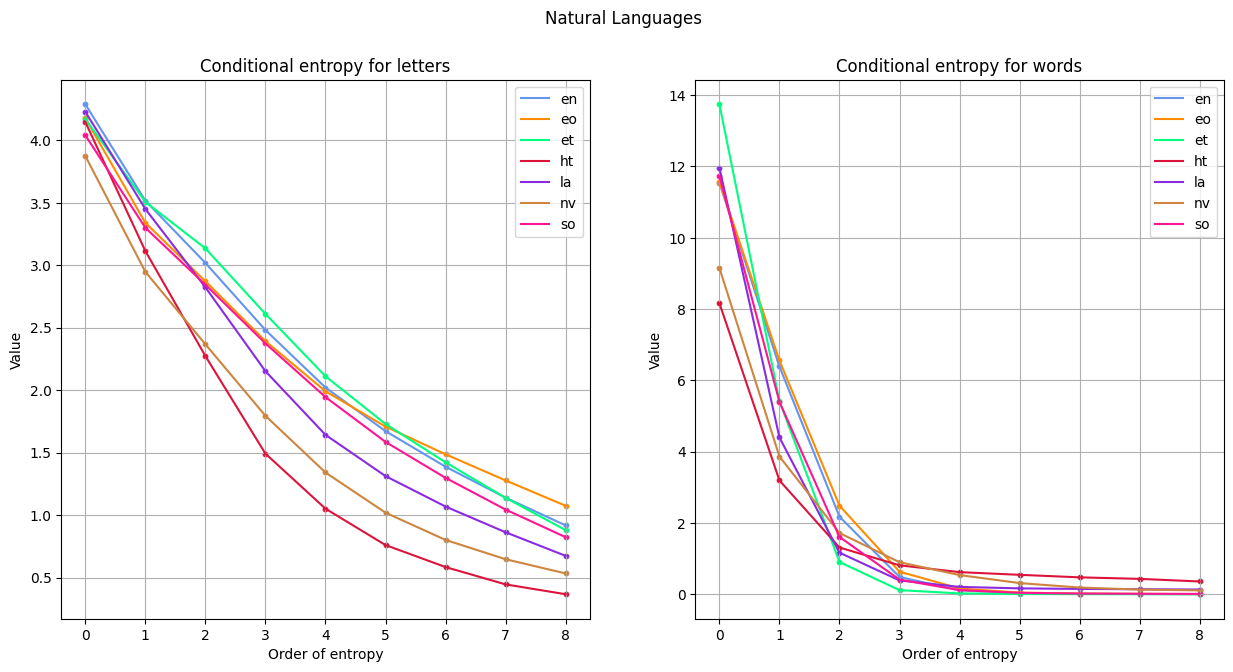

In [36]:
colors = ['cornflowerblue', 'darkorange', 'springgreen', 'crimson', 'blueviolet', 'peru', 'deeppink']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('Natural Languages')

for lang, lang_entropies, c in zip(languages, nl_char_entropies, colors):
    ax1.scatter(list(range(order + 1)), lang_entropies, s=10, c=c)
    ax1.plot(lang_entropies, label=lang, c=c)


ax1.grid(True)
ax1.legend()
ax1.set_xlabel('Order of entropy')
ax1.set_ylabel('Value')
ax1.set_title('Conditional entropy for letters')

for lang, lang_entropies, c in zip(languages, nl_word_entropies, colors):
    ax2.scatter(list(range(order + 1)), lang_entropies, s=10, c=c)
    ax2.plot(lang_entropies, label=lang, c=c)


ax2.grid(True)
ax2.legend()
ax2.set_xlabel('Order of entropy')
ax2.set_ylabel('Value')
ax2.set_title('Conditional entropy for words');


## Sample analysis

To make the comparison with natural languages more visible, let's introduce the range. If sample's entropies fall into that range, we would treat them as natural languages.

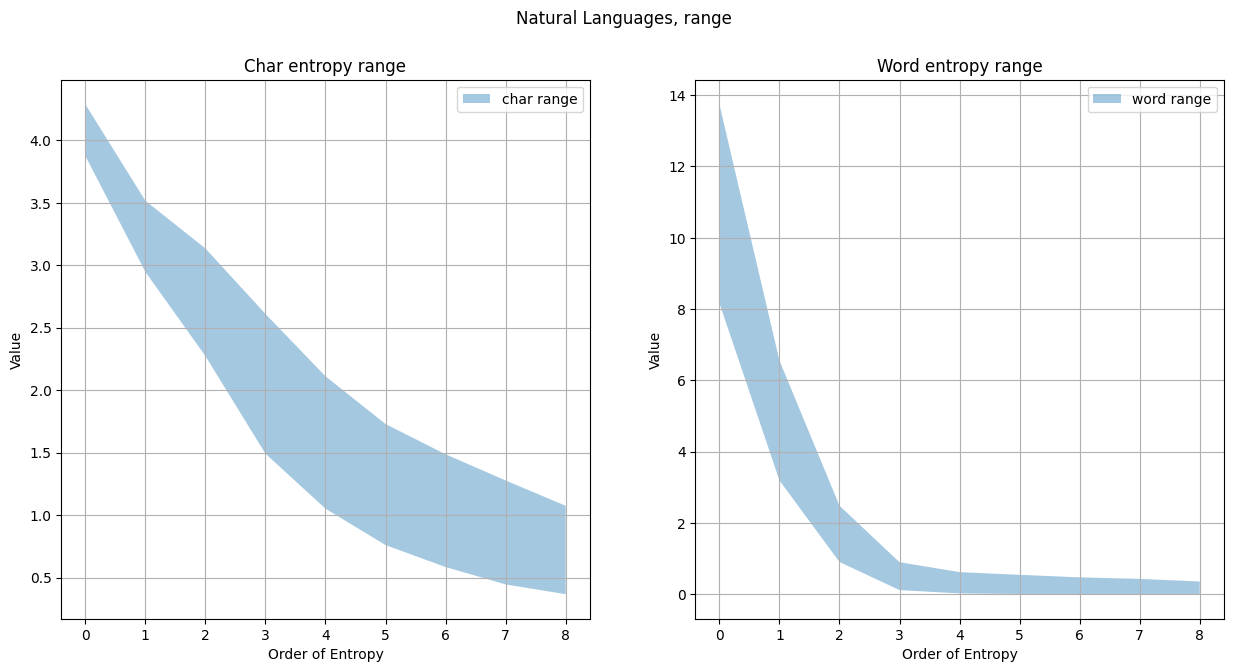

In [37]:
min_char_entropies = [min([nl_char_entropies[j][i] for j in range(len(languages))]) for i in range(order + 1)]
max_char_entropies = [max([nl_char_entropies[j][i] for j in range(len(languages))]) for i in range(order + 1)]

min_word_entropies = [min([nl_word_entropies[j][i] for j in range(len(languages))]) for i in range(order + 1)]
max_word_entropies = [max([nl_word_entropies[j][i] for j in range(len(languages))]) for i in range(order + 1)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('Natural Languages, range')

ax1.fill_between(list(range(order + 1)), min_char_entropies, max_char_entropies, alpha = 0.4, label='char range')
ax2.fill_between(list(range(order + 1)), min_word_entropies, max_word_entropies, alpha = 0.4, label='word range')

ax1.grid(True)
ax1.legend()
ax1.set_xlabel('Order of Entropy')
ax1.set_ylabel('Value')
ax1.set_title('Char entropy range')

ax2.grid(True)
ax2.legend()
ax2.set_xlabel('Order of Entropy')
ax2.set_ylabel('Value')
ax2.set_title('Word entropy range');

Then, to check the natural languages themselves, we may sketch the following graph:

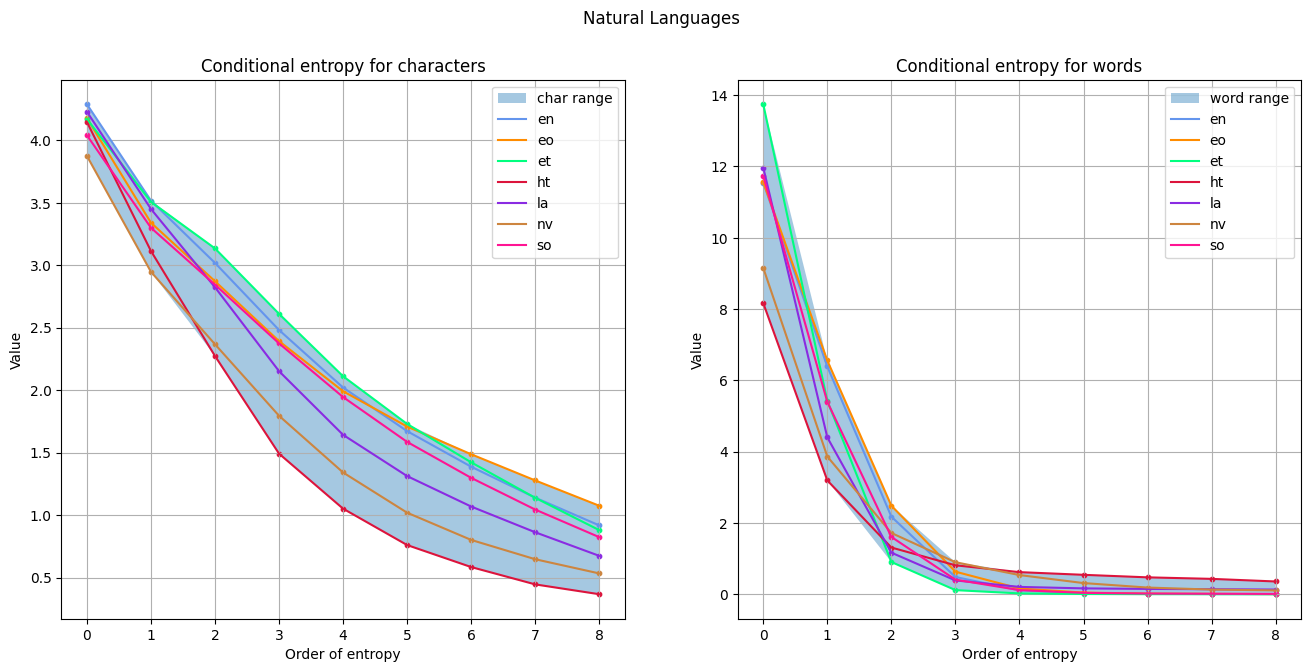

In [38]:
colors = ['cornflowerblue', 'darkorange', 'springgreen', 'crimson', 'blueviolet', 'peru', 'deeppink']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Natural Languages')

ax1.fill_between(list(range(order + 1)), min_char_entropies, max_char_entropies, alpha = 0.4, label='char range')
ax2.fill_between(list(range(order + 1)), min_word_entropies, max_word_entropies, alpha = 0.4, label='word range')

for lang, lang_entropies, c in zip(languages, nl_char_entropies, colors):
    ax1.scatter(list(range(order + 1)), lang_entropies, s=10, c=c)
    ax1.plot(lang_entropies, label=lang, c=c)


ax1.grid(True)
ax1.legend()
ax1.set_xlabel('Order of entropy')
ax1.set_ylabel('Value')
ax1.set_title('Conditional entropy for characters')


for lang, lang_entropies, c in zip(languages, nl_word_entropies, colors):
    ax2.scatter(list(range(order + 1)), lang_entropies, s=10, c=c)
    ax2.plot(lang_entropies, label=lang, c=c)


ax2.grid(True)
ax2.legend()
ax2.set_xlabel('Order of entropy')
ax2.set_ylabel('Value')
ax2.set_title('Conditional entropy for words');

Great! Now we may proceed to the samples.

#### Entropies for each sample
Calculate entropies for each of the sample texts up to 8th order:

In [39]:
sample_char_entropies = []
sample_word_entropies = []
sample_names = [f'Sample {i}' for i in range(6)]
for name, text in zip(sample_names, sample_texts):
    a = NaturalLanguageAnalyzer(order)
    a.fit(text)
    sample_char_entropies.append(a.get_char_entropies())
    sample_word_entropies.append(a.get_word_entropies())
    print(f'{name} processed')

Sample 0 processed
Sample 1 processed
Sample 2 processed
Sample 3 processed
Sample 4 processed
Sample 5 processed


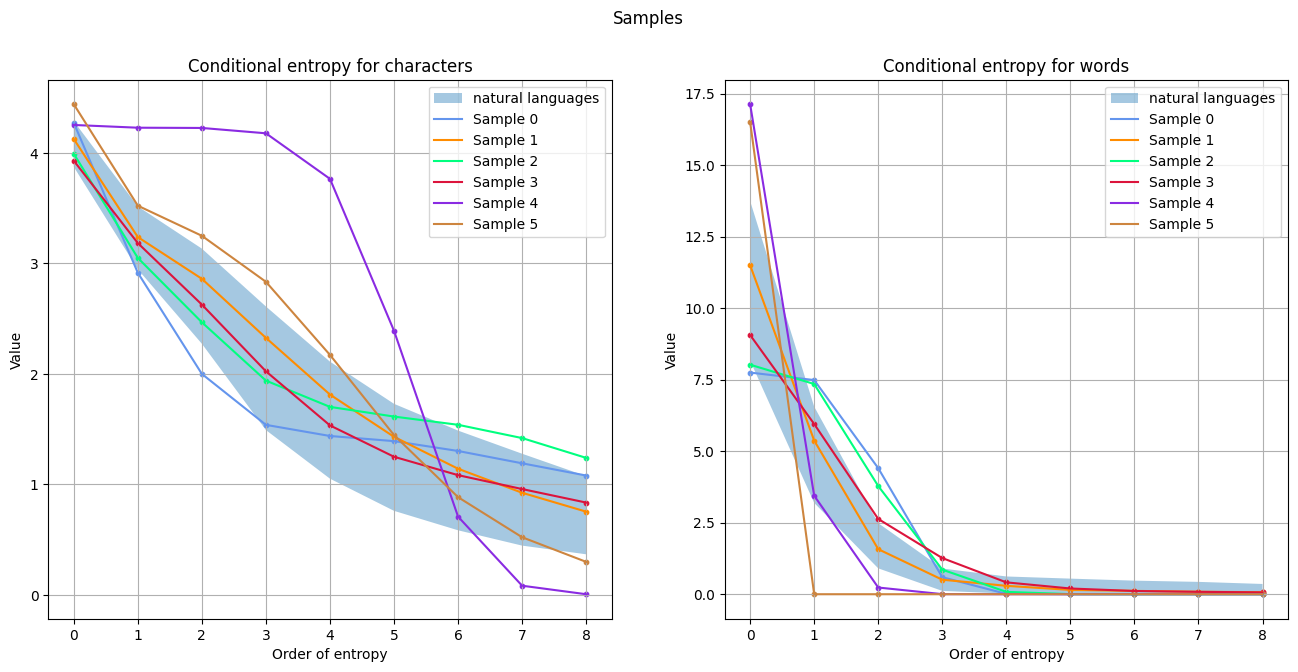

In [40]:
colors = ['cornflowerblue', 'darkorange', 'springgreen', 'crimson', 'blueviolet', 'peru', 'deeppink']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Samples')
sample_names = [f'Sample {i}' for i in range(6)]

ax1.fill_between(list(range(order + 1)), min_char_entropies, max_char_entropies, alpha = 0.4, label='natural languages')
ax2.fill_between(list(range(order + 1)), min_word_entropies, max_word_entropies, alpha = 0.4, label='natural languages')

for sample, lang_entropies, c in zip(sample_names, sample_char_entropies, colors):
    ax1.scatter(list(range(order + 1)), lang_entropies, s=10, c=c)
    ax1.plot(lang_entropies, label=sample, c=c)


ax1.grid(True)
ax1.legend()
ax1.set_xlabel('Order of entropy')
ax1.set_ylabel('Value')
ax1.set_title('Conditional entropy for characters')


for lang, lang_entropies, c in zip(sample_names, sample_word_entropies, colors):
    ax2.scatter(list(range(order + 1)), lang_entropies, s=10, c=c)
    ax2.plot(lang_entropies, label=lang, c=c)


ax2.grid(True)
ax2.legend()
ax2.set_xlabel('Order of entropy')
ax2.set_ylabel('Value')
ax2.set_title('Conditional entropy for words');

In [41]:
def describe(n: int):
    colors = ['cornflowerblue', 'darkorange', 'springgreen', 'crimson', 'blueviolet', 'peru', 'deeppink']
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
    fig.suptitle(f'Sample {n}')

    ax1.fill_between(list(range(order + 1)), min_char_entropies, max_char_entropies, alpha = 0.4, label='natural languages')
    ax2.fill_between(list(range(order + 1)), min_word_entropies, max_word_entropies, alpha = 0.4, label='natural languages')

    ax1.scatter(list(range(order + 1)), sample_char_entropies[n], s=10, c=colors[n])
    ax1.plot(sample_char_entropies[n], c=colors[n], label=f'Sample {n}')

    ax1.grid(True)
    ax1.legend()
    ax1.set_xlabel('Order of entropy')
    ax1.set_ylabel('Value')
    ax1.set_title('Conditional entropy for characters')

    ax2.scatter(list(range(order + 1)), sample_word_entropies[n], s=10, c=colors[n])
    ax2.plot(sample_word_entropies[n], c=colors[n], label=f'Sample {n}')

    ax2.grid(True)
    ax2.legend()
    ax2.set_xlabel('Order of entropy')
    ax2.set_ylabel('Value')
    ax2.set_title('Conditional entropy for words');

## Conclusions ___(6pt)___
Samples enumerated:
- Sample 0. <span style='color:crimson'>Not a natural language</span>. Although word entropy decreases as expected, word entropy barely changes with the first order compared to zeroth.

    - characters: the entropy of characters seems to be okay;

    - words: entropy barely changes on the first order, which is serious argument against it being natural language

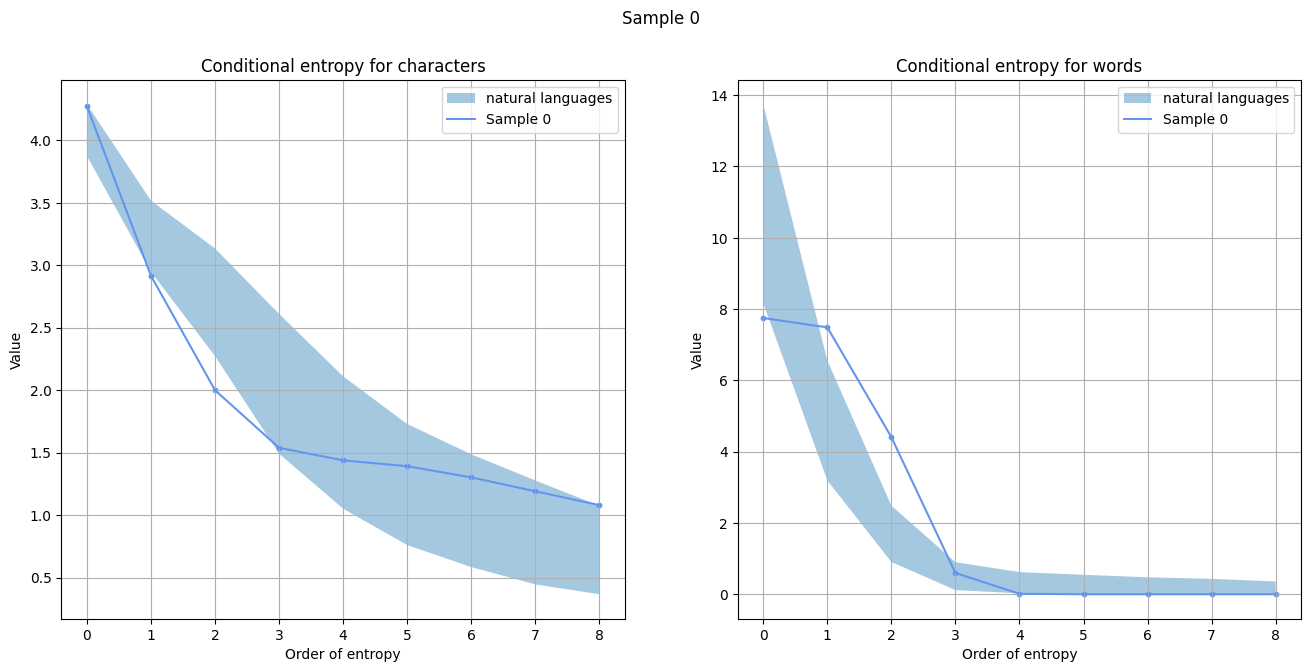

In [42]:
describe(0)

Let's take a look at this problem closer. It is apparent that the difference between slopes is colossal.

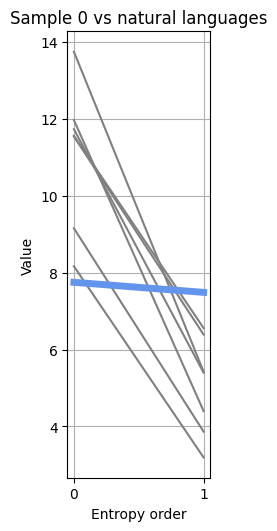

In [43]:
plt.subplots(figsize=(2,5))

for entropies in nl_word_entropies:
    plt.plot([0, 1], entropies[0:2], c='gray')

plt.plot([0, 1], sample_word_entropies[0][:2], c='cornflowerblue', linewidth=5)

plt.grid(True)
plt.xticks([0, 1])
plt.tight_layout()
plt.xlabel('Entropy order')
plt.ylabel('Value')
plt.title('Sample 0 vs natural languages');

- Sample 1. <span style="color:lightgreen">A natural language</span>. It is within the range of entropy graph of natural languages.

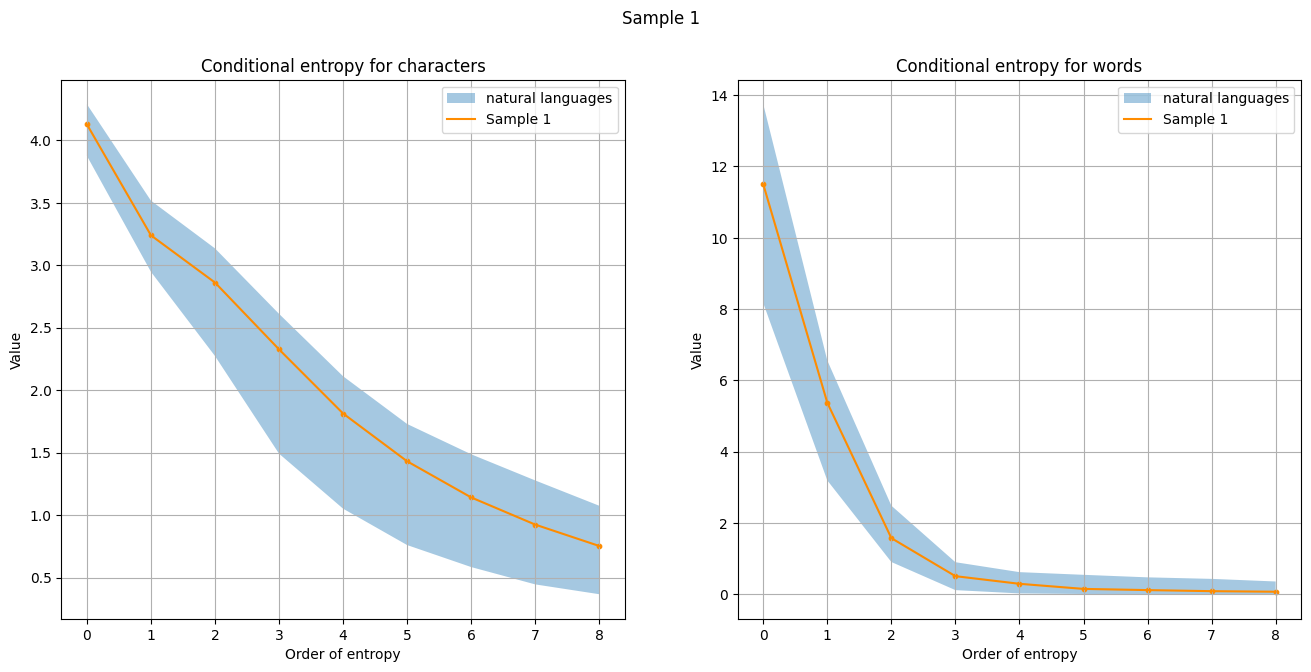

In [44]:
describe(1)

- Sample 2. <span style="color:crimson">Not a natural language</span>. The same situation as __Sample 0__

    - characters: the entropy of characters seems to be okay;

    - words: entropy barely changes on the first order, which is serious argument against it being natural language

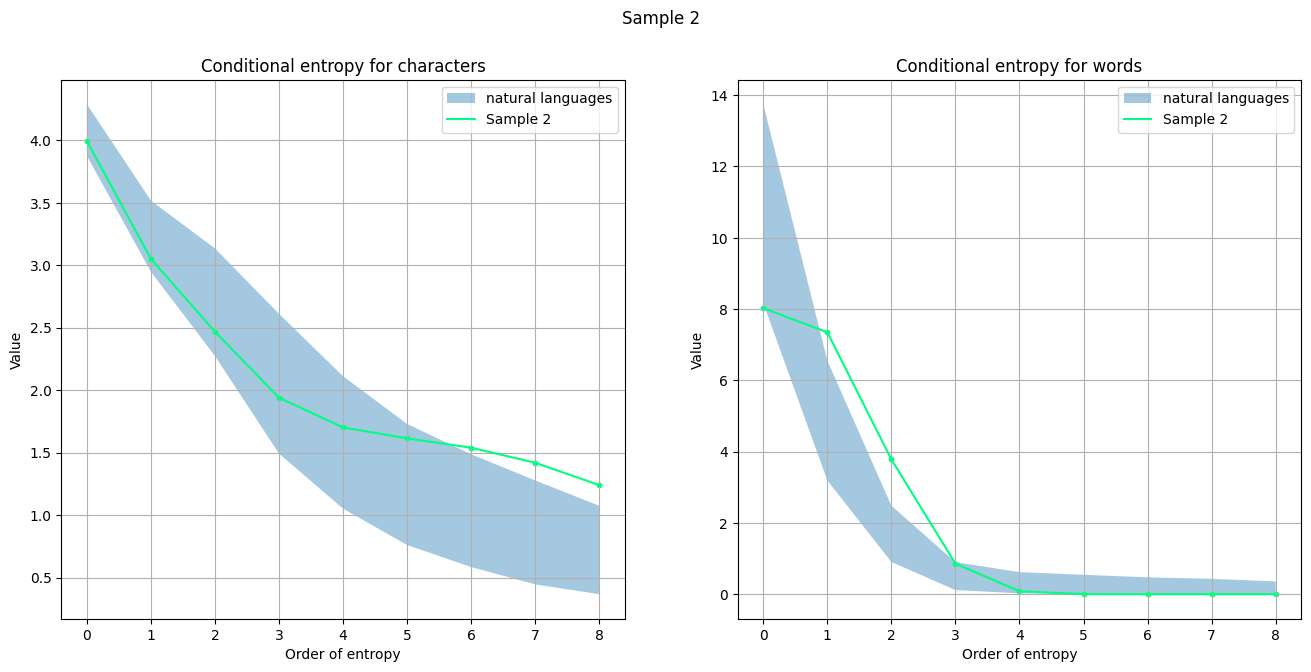

In [45]:
describe(2)

Let's take a look at this problem closer. It is apparent that the difference between slopes is colossal.

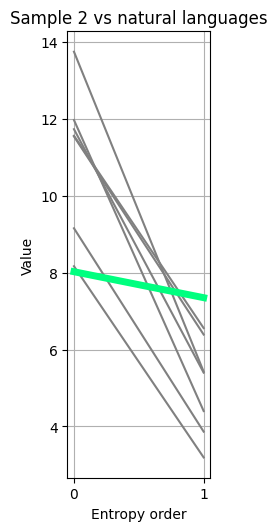

In [46]:
plt.subplots(figsize=(2,5))

for entropies in nl_word_entropies:
    plt.plot([0, 1], entropies[0:2], c='gray')

plt.plot([0, 1], sample_word_entropies[2][:2], c='springgreen', linewidth=5)

plt.grid(True)
plt.xticks([0, 1])
plt.tight_layout()
plt.xlabel('Entropy order')
plt.ylabel('Value')
plt.title('Sample 2 vs natural languages');


- Sample 3. <span style="color:lightgreen">A natural language</span>. It is within the range of entropy graph of natural languages.

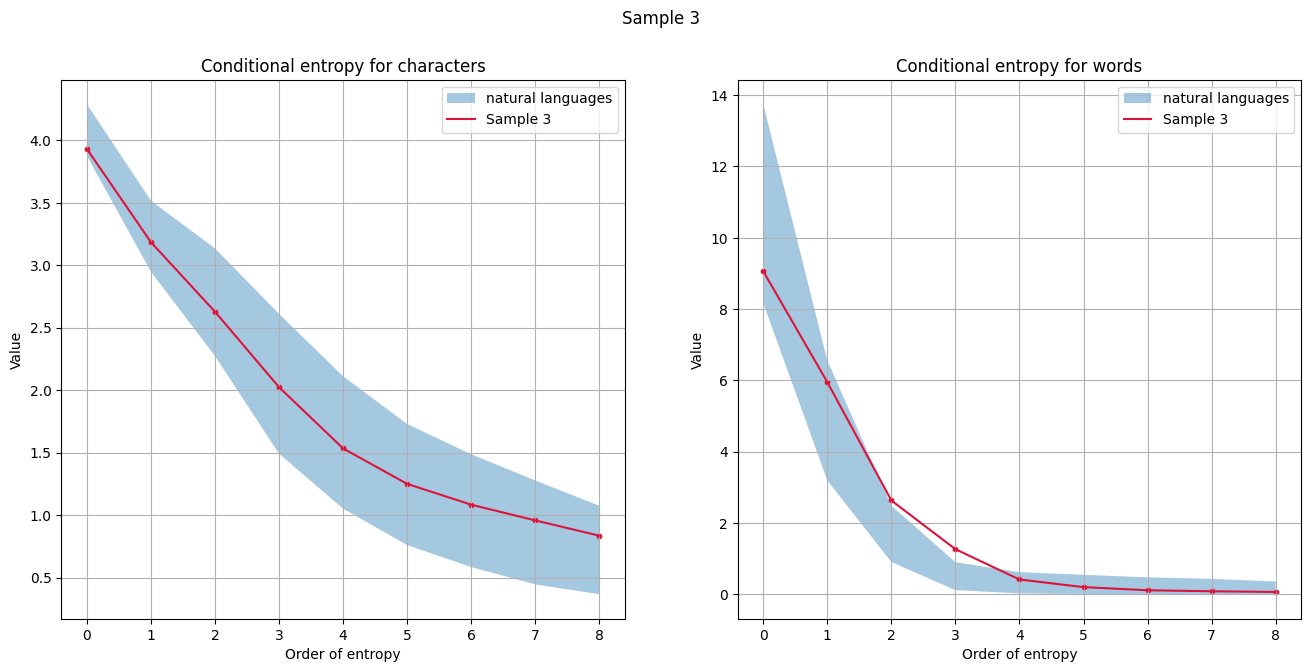

In [47]:
describe(3)

- Sample 4. <span style="color:crimson">Not a natural language</span>. 

    - characters: conditional entropy does not decrease up to 3rd order!

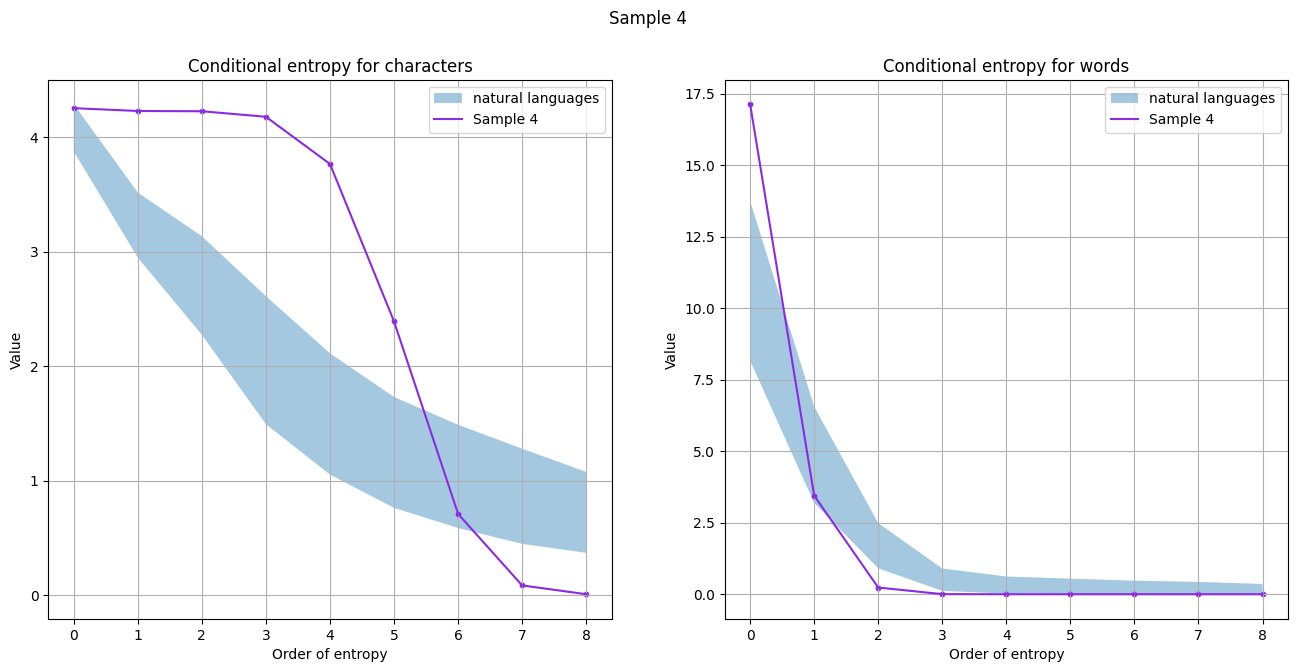

In [48]:
describe(4)

- Sample 5. <span style="color:crimson">Not a natural language</span>. Decreases entropy to 0 immediately at first order!

    - characters: the curve of conditional entropy is admissible

    - words: something strange happens here. Namely, entropy fall down to zero in the first order!

In fact, this is a tricky one. It should be investigated further further.

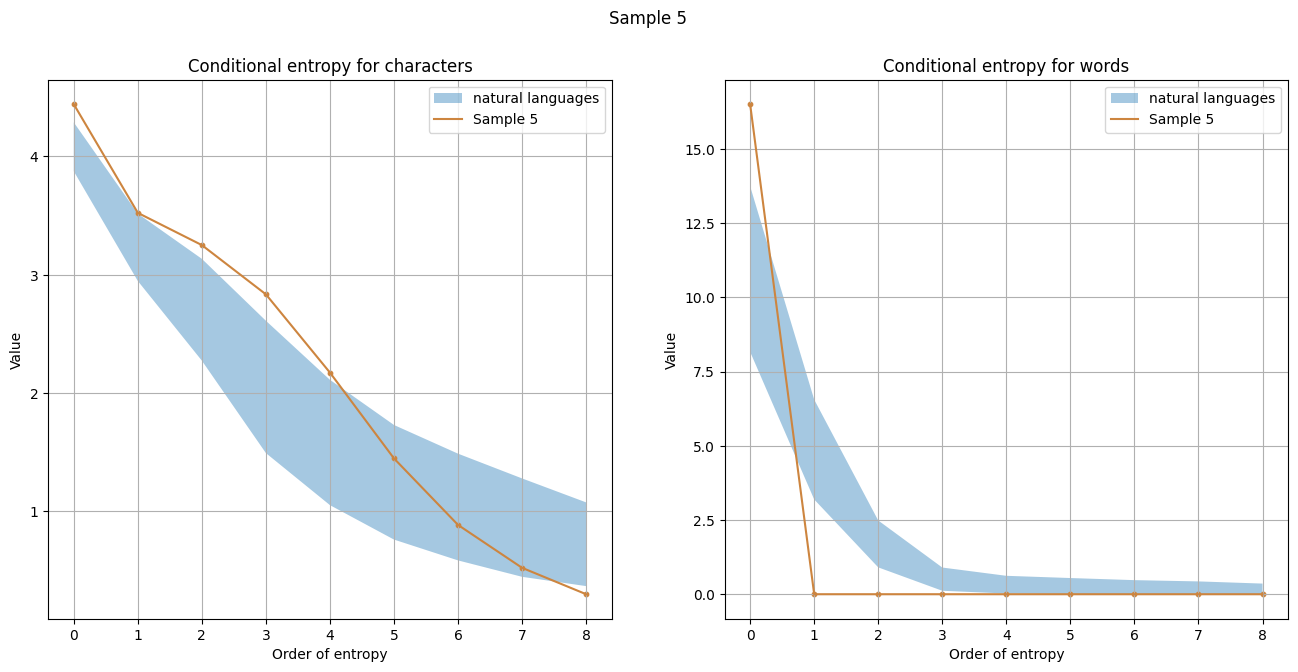

In [49]:
describe(5)

From the second graph we see that entropy's behavior is strange. It becomes 0 in the first order of conditional entropy and is zero until the 8th, last checked order. It seems that each pair is equiprobable, each triplet is equiprobable, and so on. Let's check it:

In [50]:
text = sample_texts[5]
words = text.split()

for i in range(2, order + 1):
    iples = []
    for pos in range(len(words) - i):
        iple = []
        for j in range(i):
            iple.append(words[pos + j])

        iples.append(tuple(iple))

    print(f'Iplet {i}:')
    print(f'All: {len(iples)}')
    freq = dict()

    for iple in iples:
        freq[iple] = freq.get(iple, 0) + 1
    
    print(f'Number of unique items: {len(set(iples))}')
    freq_freq = dict()

    for f in freq.values():
        freq_freq[f] = freq_freq.get(f, 0) + 1
    print(f'Number of unique quantities: {len(freq_freq.keys())}')
    print(f'Counts: {freq_freq}')

    for k, f in enumerate(freq_freq):
        if k != 0:
            print(' + ', end='')
        print(f'{f} * {freq_freq[f]}', end='')

    print(' = ', end='')

    for k, f in enumerate(freq_freq):
        if k != 0:
            print(' + ', end='')
        print(f'{f * freq_freq[f]}', end='')

    print(f' = {sum(f1 * f2 for f1, f2 in freq_freq.items())}')

    print()

Iplet 2:
All: 1492734
Number of unique items: 93296
Number of unique quantities: 2
Counts: {16: 93294, 15: 2}
16 * 93294 + 15 * 2 = 1492704 + 30 = 1492734

Iplet 3:
All: 1492733
Number of unique items: 93296
Number of unique quantities: 2
Counts: {16: 93293, 15: 3}
16 * 93293 + 15 * 3 = 1492688 + 45 = 1492733

Iplet 4:
All: 1492732
Number of unique items: 93296
Number of unique quantities: 2
Counts: {16: 93292, 15: 4}
16 * 93292 + 15 * 4 = 1492672 + 60 = 1492732



Iplet 5:
All: 1492731
Number of unique items: 93296
Number of unique quantities: 2
Counts: {16: 93291, 15: 5}
16 * 93291 + 15 * 5 = 1492656 + 75 = 1492731

Iplet 6:
All: 1492730
Number of unique items: 93296
Number of unique quantities: 2
Counts: {16: 93290, 15: 6}
16 * 93290 + 15 * 6 = 1492640 + 90 = 1492730

Iplet 7:
All: 1492729
Number of unique items: 93296
Number of unique quantities: 2
Counts: {16: 93289, 15: 7}
16 * 93289 + 15 * 7 = 1492624 + 105 = 1492729

Iplet 8:
All: 1492728
Number of unique items: 93296
Number of unique quantities: 2
Counts: {16: 93288, 15: 8}
16 * 93288 + 15 * 8 = 1492608 + 120 = 1492728



This experiment supports the hypothesis. Each i-ple, if you will, is repeated same amount of time (almost). Even though this sample completes necessary conditions(in terms of the trend of the entropy) stated in the pdf with tasks, quote:
> ...we will notice that conditional entropy of different
languages is similar and decreases as the rank becomes bigger. This is true
for both the conditional entropy of characters and words.

this sample cannot be a natural language: it has to be artificial, as such precision in repetitions with that many words - robust argument. There is no way this language has developed in 'natural' way.